## **class A에 속하는 지 분류 (이진분류 A / Not A)**
### 1. 패키지 설치 및 데이터 로드

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
# binary 형식으로 바꿔준다.
body['gender'] = np.where(body['gender']=='M', 0, 1)
body['class_1'] = np.where(body['class']=='A', 1, 0)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


### 2. 데이터 확인

In [5]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int32  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
 12  class_1                  13393 non-null  int32  
dtypes: float64(10), int32(2), object(1)
memory usage: 1.2+ MB


> 결측치가 없는 것으로 확인

In [6]:
# 종속변수와 독립변수 구분
y = body[['class_1']]
x = body[body.columns.difference(['class_1', 'class'])]
x.head()

,age,body fat_%,broad jump_cm,diastolic,gender,gripForce,height_cm,sit and bend forward_cm,sit-ups counts,systolic,weight_kg
0,27.0,21.3,217.0,80.0,0,54.9,172.3,18.4,60.0,130.0,75.24
1,25.0,15.7,229.0,77.0,0,36.4,165.0,16.3,53.0,126.0,55.80
2,31.0,20.1,181.0,92.0,0,44.8,179.6,12.0,49.0,152.0,78.00
3,32.0,18.4,219.0,76.0,0,41.4,174.5,15.2,53.0,147.0,71.10
4,28.0,17.1,217.0,70.0,0,43.5,173.8,27.1,45.0,127.0,67.70


In [7]:
x.describe()

,age,body fat_%,broad jump_cm,diastolic,gender,gripForce,height_cm,sit and bend forward_cm,sit-ups counts,systolic,weight_kg
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,23.240165,190.129627,78.796842,0.367804,36.963877,168.559807,15.209268,39.771224,130.234817,67.447316
std,13.625639,7.256844,39.868000,10.742033,0.482226,10.624864,8.426583,8.456677,14.276698,14.713954,11.949666
min,21.000000,3.000000,0.000000,0.000000,0.000000,0.000000,125.000000,-25.000000,0.000000,0.000000,26.300000
25%,25.000000,18.000000,162.000000,71.000000,0.000000,27.500000,162.400000,10.900000,30.000000,120.000000,58.200000
50%,32.000000,22.800000,193.000000,79.000000,0.000000,37.900000,169.200000,16.200000,41.000000,130.000000,67.400000
75%,48.000000,28.000000,221.000000,86.000000,1.000000,45.200000,174.800000,20.700000,50.000000,141.000000,75.300000
max,64.000000,78.400000,303.000000,156.200000,1.000000,70.500000,193.800000,213.000000,80.000000,201.000000,138.100000


> 독립변수들의 크기가 너무 다르다!! -> Scaling 필요해보인다.

__[궁금증] 독립변수들의 범위가 너무 클 때, 항상 스케일링을 해야할까?__

독립 변수들의 범위가 너무 클 때 스케일링을 해서 범위를 맞추는 것이 `항상 필요한 것은 아닙니다`. 

스케일링은 주로 다음과 같은 경우에 유용합니다:
- 1. 모델의 성능 향상: 일부 머신러닝 알고리즘은 독립 변수의 스케일에 민감하게 반응할 수 있습니다. 예를 들어, 경사 하강법을 사용하는 선형 회귀나 로지스틱 회귀와 같은 알고리즘은 스케일이 큰 변수에 영향을 받을 수 있습니다. 따라서, 독립 변수들의 스케일을 조정하면 모델의 수렴 속도가 빨라지고 성능이 향상될 수 있습니다.

- 2. 정규화: 스케일링은 종종 정규화의 일부로 사용됩니다. 변수의 범위를 조정하면 모든 변수가 동일한 스케일로 표준화되어 모델이 가중치를 학습하는 데에 도움이 됩니다. 이는 모델의 일반화 성능을 향상시키고 오버피팅을 방지하는 데에 도움이 될 수 있습니다.

- 3. 시각화: 독립 변수들을 시각화할 때 스케일링을 사용하면 차트의 축이 일관된 범위를 가지게 되어 해석이 쉬워질 수 있습니다.

그러나 모든 경우에 스케일링을 적용하는 것이 적합한 것은 아닙니다. 예를 들어, `트리 기반의 알고리즘(의사 결정 트리, 랜덤 포레스트 등)은 스케일에 민감하지 않기 때문에 스케일링을 적용할 필요가 없습니다. 또한, 스케일링은 변수의 중요도나 해석력을 감소시킬 수 있으므로 주의가 필요합니다`. 따라서, 데이터와 모델에 따라 스케일링의 적용 여부를 결정해야 합니다.

In [8]:
x

,age,body fat_%,broad jump_cm,diastolic,gender,gripForce,height_cm,sit and bend forward_cm,sit-ups counts,systolic,weight_kg
0,27.0,21.3,217.0,80.0,0,54.9,172.3,18.4,60.0,130.0,75.24
1,25.0,15.7,229.0,77.0,0,36.4,165.0,16.3,53.0,126.0,55.80
2,31.0,20.1,181.0,92.0,0,44.8,179.6,12.0,49.0,152.0,78.00
3,32.0,18.4,219.0,76.0,0,41.4,174.5,15.2,53.0,147.0,71.10
4,28.0,17.1,217.0,70.0,0,43.5,173.8,27.1,45.0,127.0,67.70
...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,16.2,198.0,74.0,0,35.8,172.1,17.4,47.0,141.0,71.80
13389,21.0,12.1,167.0,74.0,0,33.0,179.7,1.1,48.0,128.0,63.90
13390,39.0,20.1,229.0,78.0,0,63.5,177.2,16.4,45.0,132.0,80.50
13391,64.0,40.4,75.0,68.0,1,19.3,146.1,9.2,0.0,121.0,57.70


### 3. 독립변수들의 scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.71743212, -0.26736655,  0.67400862, ...,  1.41696147,
        -0.01595937,  0.65215002],
       [-0.8642197 , -1.03908068,  0.97501314, ...,  0.92663372,
        -0.28782032, -0.97473438],
       [-0.42385695, -0.43273387, -0.22900492, ...,  0.64644644,
         1.47927584,  0.88312744],
       ...,
       [ 0.16329338, -0.43273387,  0.97501314, ...,  0.36625915,
         0.1199711 ,  1.09234611],
       [ 1.99813815,  2.36472984, -2.88787813, ..., -2.7858478 ,
        -0.6276465 , -0.81572819],
       [-0.20367558, -0.51541752, -0.25408863, ...,  0.78654008,
         1.34334536, -0.11275345]])

In [10]:
df_scaled_x = pd.DataFrame(x_scaled, columns=x.columns)
df_scaled_x.head()

,age,body fat_%,broad jump_cm,diastolic,gender,gripForce,height_cm,sit and bend forward_cm,sit-ups counts,systolic,weight_kg
0,-0.717432,-0.267367,0.674009,0.112009,-0.76275,1.688190,0.443873,0.377317,1.416961,-0.015959,0.652150
1,-0.864220,-1.039081,0.975013,-0.167278,-0.76275,-0.053073,-0.422465,0.128984,0.926634,-0.287820,-0.974734
2,-0.423857,-0.432734,-0.229005,1.229158,-0.76275,0.737554,1.310211,-0.379509,0.646446,1.479276,0.883127
3,-0.350463,-0.667004,0.724176,-0.260374,-0.76275,0.417538,0.704961,-0.001096,0.926634,1.139450,0.305684
4,-0.644038,-0.846152,0.674009,-0.818948,-0.76275,0.615195,0.621888,1.406129,0.366259,-0.219855,0.021147


### 4. 학습, 테스트 셋 분리

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled_x, y, test_size=0.3, random_state=10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9375, 11) (9375, 1)
(4018, 11) (4018, 1)


### 5. 모델링

In [12]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=10)
logit.fit(X_train, y_train)

pred = logit.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# 로지스틱 회귀 그래프 그려보기
proba = pd.DataFrame(logit.predict_proba(X_train))
cs = logit.decision_function(X_train)

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

# decision_function의 결과로 얻은 Confidence Score는 
# 해당값이 x=0인 Hyperplane을 기준으로 양수/음수에 위치하는지와 얼마큼 멀리 떨어져 있는지 나타낸다
df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000e+00,6.551052e-09,-18.843640
1,1.000000e+00,1.058591e-08,-18.363742
2,1.000000e+00,1.638194e-08,-17.927086
3,1.000000e+00,4.775376e-08,-16.857208
4,9.999999e-01,6.350367e-08,-16.572168
...,...,...,...
9370,7.381133e-04,9.992619e-01,7.210675
9371,3.911497e-04,9.996089e-01,7.846029
9372,2.329096e-04,9.997671e-01,8.364627
9373,2.886580e-15,1.000000e+00,33.475117


1. predict_proba():
- predict_proba() 메서드는 각 클래스에 대한 예측 확률을 반환합니다. 이 메서드는 입력 데이터의 각 행에 대해 각 클래스에 속할 확률을 반환합니다. 일반적으로 이진 분류 문제에서는 0 또는 1로 분류되는 확률을 반환합니다.
반환된 값은 각 클래스에 속할 확률이므로, 이 값은 [0, 1] 범위에 있습니다.
이 메서드를 사용하여 예측된 확률을 기반으로 임계값을 조정하여 원하는 클래스로 분류할 수 있습니다.

2. decision_function():
- decision_function() 메서드는 각 샘플에 대한 결정 함수 값을 반환합니다. 결정 함수 값은 입력 데이터 포인트가 결정 경계로부터의 거리(부호를 포함하여)를 나타냅니다.
이 메서드는 이진 분류와 다중 분류 모두에 사용될 수 있지만, 이진 분류 문제에서는 결정 함수 값이 양성 클래스(positive class)에 대한 점수를 나타냅니다.
반환된 값은 실수 범위에 있으며, 양수 값은 양성 클래스에 해당하는 것을 나타내고 음수 값은 음성 클래스에 해당하는 것을 나타냅니다. 값의 절대 크기는 결정 경계로부터의 거리를 나타냅니다.
이 메서드를 사용하여 임계값을 조정하여 원하는 클래스로 분류할 수 있습니다.


이 두 메서드는 각각 예측된 확률과 결정 함수 값을 제공하여 모델의 예측 결과를 해석하고 분류 임계값을 조정하는 데 사용됩니다.

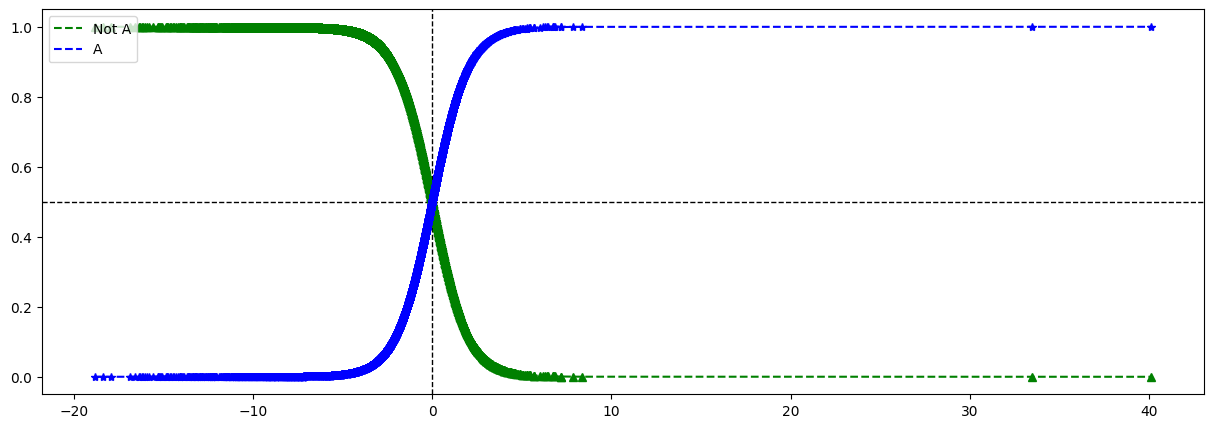

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel
plt.legend(loc='upper left')
plt.show()

### 6. 평가

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print('confusion matrix:', confusion_matrix(y_test, pred))
print('정확도:', accuracy_score(y_test, pred))
print('정밀도:', precision_score(y_test, pred))
print('재현율:', recall_score(y_test, pred))
print('f1:', f1_score(y_test, pred))

confusion matrix: [[2772  260]
 [ 378  608]]
정확도: 0.8412145345943255
정밀도: 0.7004608294930875
재현율: 0.6166328600405679
f1: 0.6558791801510249


1. 정밀도
- 정밀도는 "모델이 얼마나 정확하게 Positive로 예측하는지"를 나타내는 지표
- Positive로 예측한 샘플 중 실제로 Positive인 샘플의 비율

2. 재현율
- 재현율은 "실제로 Positive인 샘플 중 모델이 얼마나 잘 찾아내는지"를 나타내는 지표
- 재현율은 실제 Positive인 샘플 중 모델이 Positive로 예측한 샘플의 비율

3. F1 score
- F1 점수는 정밀도와 재현율의 조화 평균으로, 둘 중 하나가 낮을 때 점수가 낮아지므로 모델의 성능을 평가할 때 유용


이러한 세 가지 지표는 이진 분류 모델의 성능을 평가하는 데 사용되며, 모델이 얼마나 정확하게 예측하는지와 모델이 얼마나 잘 Positive 샘플을 찾아내는지를 고려합니다.


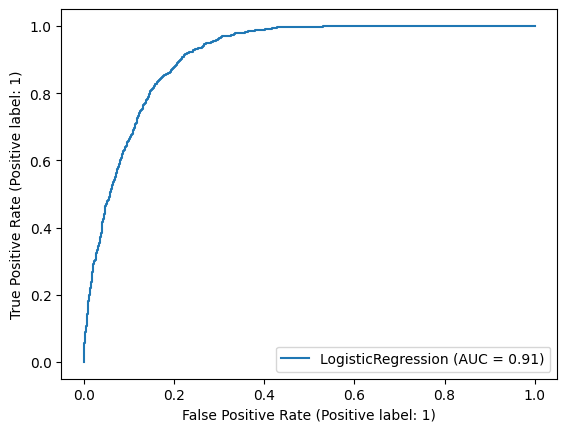

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logit, X_test, y_test)
plt.show()

> ROC 곡선(Receiver Operating Characteristic curve)은 이진 분류 모델의 성능을 시각화하는 데 사용되는 도구입니다. ROC 곡선은 `분류 모델의 임계값(threshold)을 변화시키면서 진짜 양성 비율(True Positive Rate, TPR)에 대한 거짓 양성 비율(False Positive Rate, FPR)을 그래프로 나타냅니다.`

1. 진짜 양성 비율(True Positive Rate, TPR): 실제 양성인 샘플 중 모델이 정확하게 양성으로 예측한 비율을 나타냅니다. TPR은 민감도(Sensitivity) 또는 재현율(Recall)로도 알려져 있습니다. TPR은 다음과 같이 정의됩니다: 
    - TPR= TP+FN / TP
    - 여기서 TP는 실제 양성인 샘플을 올바르게 양성으로 예측한 수(참 양성), FN은 실제 양성인 샘플을 부정으로 잘못 분류한 수(거짓 음성)입니다.

2. 거짓 양성 비율(False Positive Rate, FPR): 실제 음성인 샘플 중 모델이 잘못하여 양성으로 예측한 비율을 나타냅니다. FPR은 다음과 같이 정의됩니다: 
    - FPR= FP+TN / FP
    - 여기서 FP는 실제 음성인 샘플을 잘못하여 양성으로 예측한 수(거짓 양성), TN은 실제 음성인 샘플을 올바르게 음성으로 예측한 수(참 음성)입니다.